In [2]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
Q = np.zeros((STATES, ACTIONS)) # Create a matrix with all 0 values
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Constants
As we discussed we need to define some constants that will be used to update our Q_Table and tell our agent to stop training.

In [4]:
EPISODES = 2000 # How many times to run the environment from the beginning
MAX_sTEPS = 100 # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 # learning rate
GAMMA = 0.96

### Picking an Action
Remember that we can pick an action using one of two methods.
> 1. Randomly picking a valid action
> 2. Using the current Q-Table to find th e best action

We will define a new value epsilon that will tell us the probability of selecting a random action. This val will start off very high and slowly decrease as the agent learns more about the environment.

In [5]:
epsilon = 0.9 # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon: # We will check if a randomly selected value is less than ipsilon
  action = env.action_space.sample() # Take random action
else:
  # It tells us the index of the maximum element, i.e what row or column it is in the Q table
  action = np.argmax(Q[state, :]) # use Q table to pick best action on current values

### Updaating Q Values
The code below implements the formula discussed  above.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

### Putting it all Together
Now that we know how to do some basic things we can combine these together to create our Q-Learning Algorithm

In [1]:
import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the environment from the beginning
MAX_STEPS = 100 # max number of steps allowed for each run of the environment

LEARNING_RATE = 0.81 # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now, we can see our Q values

[[2.41342126e-01 4.45116674e-02 4.39395609e-02 4.15799736e-02]
 [2.37539626e-03 2.18642316e-02 2.92150325e-03 4.80996018e-01]
 [1.53762240e-02 2.85443231e-02 1.60903739e-02 2.32415472e-01]
 [9.27205457e-03 7.09778954e-03 9.53244990e-03 1.30188584e-01]
 [4.57857799e-01 1.83672193e-02 4.78756709e-04 8.52950169e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49535086e-01 2.99204892e-05 2.47409049e-05 1.97619395e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.26401940e-02 1.16305597e-02 1.44868715e-02 5.84165252e-01]
 [3.08538332e-03 7.84269533e-01 2.94425810e-03 5.41278421e-03]
 [6.77101044e-01 1.04293872e-03 1.92511706e-03 1.07952476e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.95069515e-02 2.25370107e-02 8.24434295e-01 2.10679455e-02]
 [1.81823480e-01 9.66850106e-01 7.93947524e-02 1.37522326e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


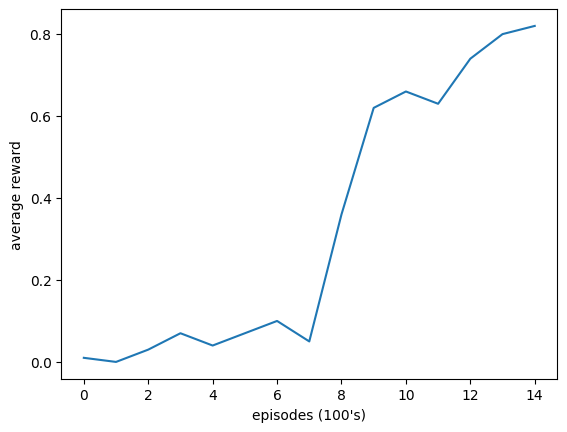

In [4]:
# We can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i: i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()